In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df=pd.read_csv(r'/content/drive/My Drive/US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64


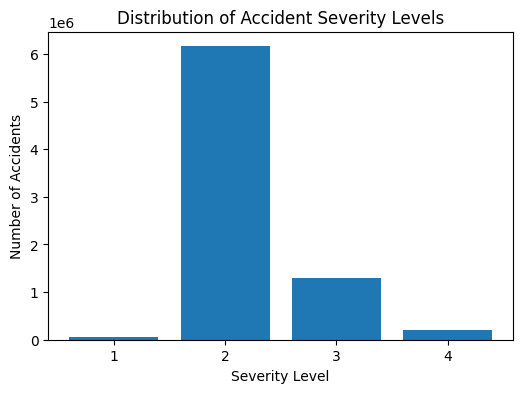

In [7]:
#Q1
import matplotlib.pyplot as plt

severity_counts = df['Severity'].value_counts().sort_index()

print(severity_counts)


plt.figure(figsize=(6, 4))
plt.bar(severity_counts.index, severity_counts.values)
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Accident Severity Levels")
plt.xticks(severity_counts.index)
plt.show()

Hour
0.0      98452
1.0      85743
2.0      82394
3.0      74229
4.0     149077
5.0     209579
6.0     375179
7.0     546789
8.0     541643
9.0     334067
10.0    313625
11.0    322215
12.0    316904
13.0    352361
14.0    394697
15.0    463389
16.0    520177
17.0    516626
18.0    390621
19.0    267045
20.0    201883
21.0    169500
22.0    148605
23.0    110428
Name: count, dtype: int64


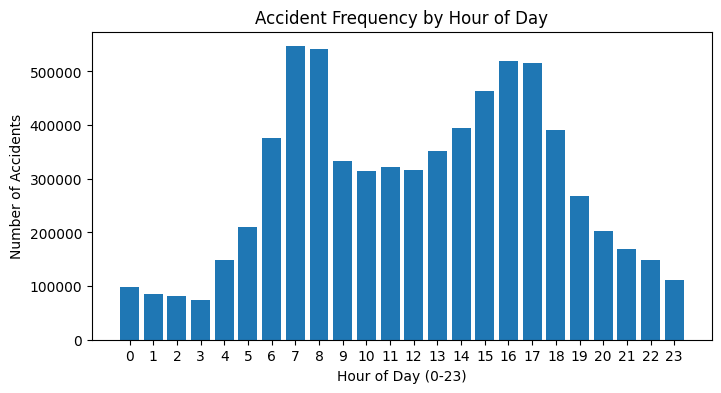

In [9]:
#Q2

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour

hour_counts = df['Hour'].value_counts().sort_index()

print(hour_counts)

plt.figure(figsize=(8, 4))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Accidents")
plt.title("Accident Frequency by Hour of Day")
plt.xticks(range(0, 24))
plt.show()


DayOfWeek
Monday       1108807
Tuesday      1177923
Wednesday    1195864
Thursday     1196137
Friday       1237229
Saturday      579153
Sunday        490115
Name: count, dtype: int64


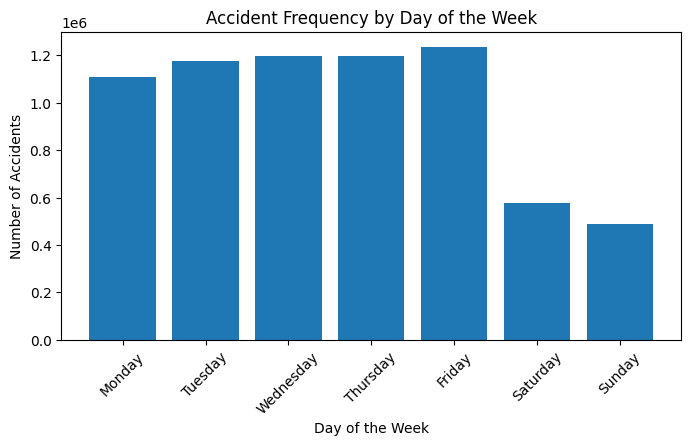

In [11]:
#Q3
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['DayOfWeek'] = df['Start_Time'].dt.day_name()

day_counts = df['DayOfWeek'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

print(day_counts)

plt.figure(figsize=(8, 4))
plt.bar(day_counts.index, day_counts.values)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Accident Frequency by Day of the Week")
plt.xticks(rotation=45)
plt.show()

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64


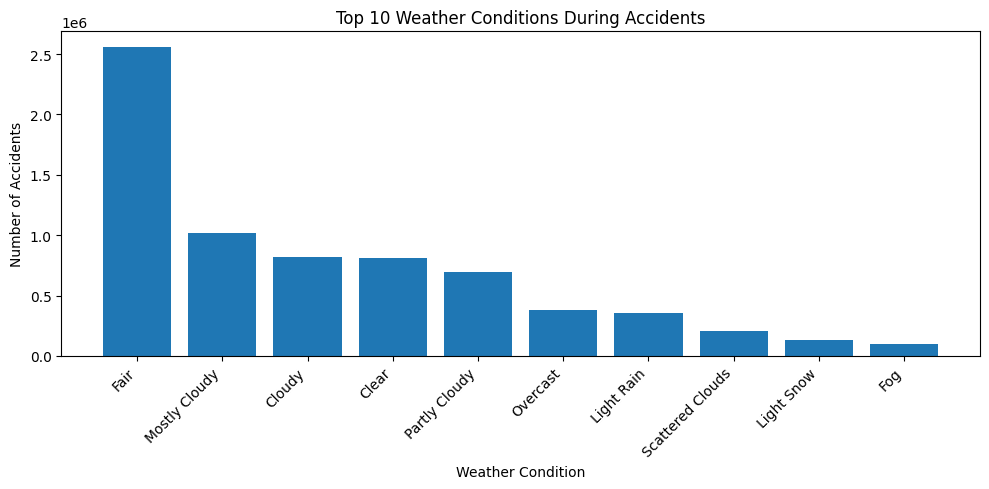

In [12]:
#Q4
weather_counts = df['Weather_Condition'].value_counts().head(10)

print(weather_counts)


plt.figure(figsize=(10, 5))
plt.bar(weather_counts.index, weather_counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
#Q5
missing_counts = df.isna().sum()

missing_percentage = (missing_counts / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Missing Percentage': missing_percentage
})

missing_data = missing_data[missing_data['Missing Values'] > 0]

missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

print(missing_data)

                       Missing Values  Missing Percentage
End_Lat                       3402762           44.029355
End_Lng                       3402762           44.029355
Precipitation(in)             2203586           28.512858
Wind_Chill(F)                 1999019           25.865904
Start_Time                     743166            9.616047
Hour                           743166            9.616047
DayOfWeek                      743166            9.616047
Wind_Speed(mph)                571233            7.391355
Visibility(mi)                 177098            2.291524
Wind_Direction                 175206            2.267043
Humidity(%)                    174144            2.253301
Weather_Condition              173459            2.244438
Temperature(F)                 163853            2.120143
Pressure(in)                   140679            1.820288
Weather_Timestamp              120228            1.555666
Civil_Twilight                  23246            0.300787
Sunrise_Sunset

In [14]:
#Q6

numeric_cols = df.select_dtypes(include=['number']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [15]:
#Q7
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_value)

In [20]:
#Q8
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Weather_Condition_Encoded'] = le.fit_transform(df['Weather_Condition'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Blowing Dust': np.int64(0), 'Blowing Dust / Windy': np.int64(1), 'Blowing Sand': np.int64(2), 'Blowing Snow': np.int64(3), 'Blowing Snow / Windy': np.int64(4), 'Blowing Snow Nearby': np.int64(5), 'Clear': np.int64(6), 'Cloudy': np.int64(7), 'Cloudy / Windy': np.int64(8), 'Drifting Snow': np.int64(9), 'Drifting Snow / Windy': np.int64(10), 'Drizzle': np.int64(11), 'Drizzle / Windy': np.int64(12), 'Drizzle and Fog': np.int64(13), 'Dust Whirls': np.int64(14), 'Duststorm': np.int64(15), 'Fair': np.int64(16), 'Fair / Windy': np.int64(17), 'Fog': np.int64(18), 'Fog / Windy': np.int64(19), 'Freezing Drizzle': np.int64(20), 'Freezing Rain': np.int64(21), 'Freezing Rain / Windy': np.int64(22), 'Funnel Cloud': np.int64(23), 'Hail': np.int64(24), 'Haze': np.int64(25), 'Haze / Windy': np.int64(26), 'Heavy Blowing Snow': np.int64(27), 'Heavy Drizzle': np.int64(28), 'Heavy Freezing Drizzle': np.int64(29), 'Heavy Freezing Rain': np.int64(30), 'Heavy Freezing Rain / Windy': np.int64(31), 'Heavy Ice 

In [18]:
#Q9
df_encoded = pd.get_dummies(df, columns=['Weather_Condition'], prefix='Weather')


print(df_encoded.head())

    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng    End_Lat   End_Lng  Distance(mi)  ...  \
0 -84.058723  36.183495 -88.02789          0.01  ...   
1 -82.831184  36.183495 -88.02789          0.01  ...   
2 -84.032608  36.183495 -88.02789          0.01  ...   
3 -84.205582  36.183495 -88.02789          0.01  ...   
4 -84.188354  36.183495 -88.02789          0.01  ...   

  Weather_Thunder in the Vicinity Weather_Thunderstorm  \
0                           False                False   
1                           False                False   
2 